In [124]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

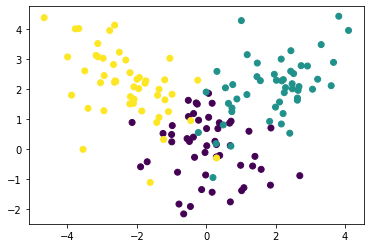

In [125]:
# Generate a dataset with three classes using Gaussian distributions
n = 50

# Class 1
X1 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], n)

# Class 2
X2 = np.random.multivariate_normal([2, 2], [[1, 0.5], [0.5, 1]], n)

# Class 3 
X3 = np.random.multivariate_normal([-2, 2], [[1, -0.5], [-0.5, 1]], n)

# Concatenate data and labels
X = np.vstack((X1, X2, X3))
y = np.hstack((np.zeros(n), np.ones(n), 2 * np.ones(n)))

# Plot dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.show()


In [126]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Train and test a support vector machine model with a linear kernel
linear_svm = SVC(kernel='linear')
linear_params = {'C': [0.1, 1, 10]}
linear_grid = GridSearchCV(linear_svm, linear_params, cv=5)
linear_grid.fit(X_train, y_train)
linear_preds_train = linear_grid.predict(X_train)
linear_preds_test = linear_grid.predict(X_test)
linear_acc_train = accuracy_score(y_train, linear_preds_train)
linear_acc_test = accuracy_score(y_test, linear_preds_test)

# Train and test a support vector machine model with a polynomial kernel
poly_svm = SVC(kernel='poly')
poly_params = {'C': [0.1, 1, 10], 'degree': [2, 3, 4]}
poly_grid = GridSearchCV(poly_svm, poly_params, cv=5)
poly_grid.fit(X_train, y_train)
poly_preds_train = poly_grid.predict(X_train)
poly_preds_test = poly_grid.predict(X_test)
poly_acc_train = accuracy_score(y_train, poly_preds_train)
poly_acc_test = accuracy_score(y_test, poly_preds_test)

# Train and test a support vector machine model with an RBF kernel
rbf_svm = SVC(kernel='rbf')
rbf_params = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
rbf_grid = GridSearchCV(rbf_svm, rbf_params, cv=5)
rbf_grid.fit(X_train, y_train)
rbf_preds_train = rbf_grid.predict(X_train)
rbf_preds_test = rbf_grid.predict(X_test)
rbf_acc_train = accuracy_score(y_train, rbf_preds_train)
rbf_acc_test = accuracy_score(y_test, rbf_preds_test)

# Print the accuracy of each model on both training and test sets
print('Linear SVM train accuracy: {:.3f}'.format(linear_acc_train))
print('Linear SVM test accuracy: {:.3f}'.format(linear_acc_test))
print('Polynomial SVM train accuracy: {:.3f}'.format(poly_acc_train))
print('Polynomial SVM test accuracy: {:.3f}'.format(poly_acc_test))
print('RBF SVM train accuracy: {:.3f}'.format(rbf_acc_train))
print('RBF SVM test accuracy: {:.3f}'.format(rbf_acc_test))


Linear SVM train accuracy: 0.893
Linear SVM test accuracy: 0.907
Polynomial SVM train accuracy: 0.867
Polynomial SVM test accuracy: 0.867
RBF SVM train accuracy: 0.920
RBF SVM test accuracy: 0.880
